##  Bike-sharing system case study

### Problem Statement:
Understand the factors on which the demand for shared bikes depends in the American market. 
The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1:Data Understanding & Cleaning

In [112]:
#import libraries
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

In [113]:
#read the csv file
bike_sharing_data = pd.read_csv("day.csv")

#check the head of the dataset
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [114]:
#shape
bike_sharing_data.shape

(730, 16)

In [115]:
#column data types
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [116]:
#summuray statistics for numeric variables
bike_sharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Data cleaning 
- handling null values
- drop unnecessary varibles
- handling incorrect datatypes


<h5>1.handling null values</h5>
<p>We observed that the dataset has no null values</p>

<h5>2.drop unnecessary varibles & 3.handling incorrect datatypes</h5>

#### instant

In [117]:
#instant : record index
bike_sharing_data['instant'].value_counts()
#consists of 730 distinct values

730    1
251    1
249    1
248    1
247    1
246    1
245    1
244    1
243    1
242    1
241    1
240    1
239    1
238    1
237    1
236    1
235    1
234    1
233    1
232    1
231    1
250    1
252    1
229    1
253    1
272    1
271    1
270    1
269    1
268    1
267    1
266    1
265    1
264    1
263    1
262    1
261    1
260    1
259    1
258    1
257    1
256    1
255    1
254    1
230    1
228    1
183    1
205    1
203    1
202    1
201    1
200    1
199    1
198    1
197    1
196    1
195    1
194    1
193    1
192    1
191    1
190    1
189    1
188    1
187    1
186    1
185    1
204    1
206    1
227    1
207    1
226    1
225    1
224    1
223    1
222    1
221    1
220    1
219    1
218    1
217    1
216    1
215    1
214    1
213    1
212    1
211    1
210    1
209    1
208    1
273    1
274    1
275    1
342    1
340    1
339    1
338    1
337    1
336    1
335    1
334    1
333    1
332    1
331    1
330    1
329    1
328    1
327    1
326    1
325    1
324    1
3

the column 'instant' uniquely identifies each row,
and is not important in predicting the demand for shared bikes
therefore we can drop the column 'instant'

In [118]:
#drop the column 'instant'
bike_sharing_data = bike_sharing_data.drop('instant',axis=1)
bike_sharing_data.shape

(730, 15)

#### dteday 

In [119]:
bike_sharing_data['dteday'].value_counts()

20-07-2018    1
31-12-2019    1
29-10-2019    1
29-06-2019    1
26-02-2019    1
11-06-2018    1
30-04-2019    1
19-01-2018    1
14-04-2019    1
21-08-2019    1
17-01-2019    1
24-08-2019    1
25-09-2018    1
10-06-2018    1
25-07-2018    1
28-06-2018    1
10-04-2018    1
13-11-2018    1
24-05-2019    1
05-12-2018    1
07-10-2019    1
07-03-2019    1
18-01-2019    1
13-06-2019    1
30-01-2019    1
08-07-2019    1
15-11-2018    1
14-10-2019    1
12-06-2019    1
27-02-2019    1
28-11-2018    1
25-08-2018    1
02-05-2018    1
10-03-2019    1
07-04-2018    1
03-12-2019    1
24-12-2018    1
01-12-2019    1
15-04-2018    1
23-08-2019    1
26-04-2018    1
01-10-2018    1
16-03-2018    1
08-11-2018    1
28-09-2018    1
04-03-2018    1
08-05-2018    1
28-05-2019    1
03-08-2018    1
05-12-2019    1
03-06-2018    1
19-08-2019    1
07-12-2018    1
29-07-2018    1
27-03-2018    1
30-01-2018    1
28-10-2019    1
19-04-2019    1
21-11-2018    1
01-01-2019    1
15-07-2019    1
12-11-2019    1
24-07-20

we have already derived varibles like season,yr,month,weekday from the column 'dteday'
therefore we can drop it as it conveys the same information that we get from the above mentioned derived variables

In [120]:
#drop column dteday
bike_sharing_data = bike_sharing_data.drop('dteday',axis=1)

In [121]:
bike_sharing_data.shape

(730, 14)

##### season

In [122]:
#season
bike_sharing_data['season'].value_counts(dropna=False)

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [123]:
#finding months corresponsing to the season=1(spring)
bike_sharing_data[bike_sharing_data['season']==1]['mnth'].value_counts()
# months 12,1,2,3(dec,jan,feb,march) comes under spring

1     62
2     56
3     40
12    22
Name: mnth, dtype: int64

In [124]:
#finding months corresponsing to the season=2(summer)
bike_sharing_data[bike_sharing_data['season']==2]['mnth'].value_counts()
# months 3,4,5,6(march,april,may,june) comes under summer

5    62
4    60
6    40
3    22
Name: mnth, dtype: int64

In [125]:
#finding months corresponsing to the season=3(fall)
bike_sharing_data[bike_sharing_data['season']==3]['mnth'].value_counts()
# months 6,7,8,9(june,july,aug,sept) comes under fall

8    62
7    62
9    44
6    20
Name: mnth, dtype: int64

In [126]:
#finding months corresponsing to the season=4(winter)
bike_sharing_data[bike_sharing_data['season']==4]['mnth'].value_counts()
# months 9,10,11,12(sept,oct,nov,dec) comes under winter

10    62
11    60
12    40
9     16
Name: mnth, dtype: int64

<p>from the data dictionary we know that season has following values<p>
1:spring, 2:summer, 3:fall, 4:winter.
From this we understand that season is a categorical varible with values 1,2,3,4 corresponding to spring,summer,fall,winter respectively

In [127]:
#convert season to categorical variable
bike_sharing_data['season'] = bike_sharing_data['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [128]:
bike_sharing_data['season'].value_counts(dropna=False)

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

##### yr

In [129]:
bike_sharing_data['yr'].value_counts(dropna=False)

1    365
0    365
Name: yr, dtype: int64

from data dictionary we find that (0: 2018, 1:2019).
Therefore convert 'yr' to categorical variable

In [130]:
#convert yr to cateforical variable
bike_sharing_data['yr'] = bike_sharing_data['yr'].map({0:'2018',1:'2019'})

In [131]:
bike_sharing_data['yr'].value_counts(dropna=False)

2019    365
2018    365
Name: yr, dtype: int64

#### mnth

In [132]:
bike_sharing_data['mnth'].value_counts(dropna=False)

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [133]:
#convert mnth to cateforical variable
months = {1:'JAN',2:'FEB',3:'MAR',4:'APRIL',5:
         'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'}
bike_sharing_data['mnth'] = bike_sharing_data['mnth'].map(months)

In [134]:
bike_sharing_data['mnth'].value_counts(dropna=False)

JULY     62
JAN      62
OCT      62
AUG      62
MAR      62
DEC      62
MAY      62
SEP      60
NOV      60
APRIL    60
JUNE     60
FEB      56
Name: mnth, dtype: int64

##### holiday :weather day is a holiday or not

In [135]:
bike_sharing_data['holiday'].value_counts(dropna=False)

0    709
1     21
Name: holiday, dtype: int64

holiday is binary numeric variable,no need to covert it to categorical

##### weekday :day of the week

In [136]:
bike_sharing_data['weekday'].value_counts(dropna=False)

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [137]:
#converting to categorical variable
weekday = {0:'SUN',1:'MON',2:'TUE',3:'WED',4:'THRU',5:'FRI',6:'SAT'}
bike_sharing_data['weekday'] = bike_sharing_data['weekday'].map(weekday)

In [138]:
bike_sharing_data['weekday'].value_counts(dropna=False)

SUN     105
SAT     105
MON     105
THRU    104
FRI     104
TUE     104
WED     103
Name: weekday, dtype: int64

###### workingday :if day is neither weekend nor holiday is 1, otherwise is 0.

In [139]:
bike_sharing_data['workingday'].value_counts(dropna=False)

1    499
0    231
Name: workingday, dtype: int64

workingday is a binary numeric variable,therefore need not convert to categorical variable

###### weathersit

In [140]:
bike_sharing_data['weathersit'].value_counts(dropna=False)

1    463
2    246
3     21
Name: weathersit, dtype: int64

from data dictionary we know what 1,2,3 values implies - 
- 1: Clear
- 2: Mist_Cloudy
- 3: Light_Snow_Light_Rain
- 4: Heavy_Rain_Ice_Pallets

In [141]:
#Convert weathersit into categorical form
weathersit = {1:'Clear',2:'Mist_Cloudy',3:'Light_Snow_Light_Rain',4:'Heavy_Rain_Ice_Pallets'}
bike_sharing_data['weathersit'] = bike_sharing_data['weathersit'].map(weathersit)

In [142]:
bike_sharing_data['weathersit'].value_counts(dropna=False)

Clear                    463
Mist_Cloudy              246
Light_Snow_Light_Rain     21
Name: weathersit, dtype: int64

##### inspecting columns temp,atemp,hum,windspeed

In [143]:
bike_sharing_data[['temp','atemp','hum','windspeed']].head()

,temp,atemp,hum,windspeed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113
2,8.050924,9.47025,43.7273,16.636703
3,8.200000,10.60610,59.0435,10.739832
4,9.305237,11.46350,43.6957,12.522300


The column 'atemp' is feeling temperature in Celsius.
This combines the effect of humidity and windspeed with the actual temp,to give us the feels like temp on our skin.

In [144]:
#checking correlation between temp and atemp
bike_sharing_data[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


In [145]:
# we observe that temp and atemp are 99 percent correlated,therefore drop atemp
bike_sharing_data = bike_sharing_data.drop(['atemp'],axis=1)

##### inspecting columns casual,registered,cnt

In [146]:
bike_sharing_data[['casual','registered','cnt']].head()

,casual,registered,cnt
0,331,654,985
1,131,670,801
2,120,1229,1349
3,108,1454,1562
4,82,1518,1600


from the data dictionary we understand that
   - casual: count of casual users
   - registered: count of registered users
   - cnt: count of total rental bikes including both casual and registered

Since the column 'cnt' gives us the total count of users on a particular day including both
casual and registered ,we can drop columns casual and registered

In [147]:
#drop cols casual and registered
bike_sharing_data = bike_sharing_data.drop(['casual','registered'],axis=1)

In [148]:
bike_sharing_data.shape

(730, 11)

In [149]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,JAN,0,SAT,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,JAN,0,SUN,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,JAN,0,MON,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,JAN,0,TUE,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,JAN,0,WED,1,Clear,9.305237,43.6957,12.522300,1600


In [150]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 62.9+ KB


#### Target variable : 'cnt' ,It  gives the count of total number of rental bikes on a particular day

## Step 2:EDA and Data Visualisation

 - Visulize the variable spread and its effect on the target variable.
 - Pair plot of all numeric variables
 - Heatmap : check correlation between variables
 

### Visulize the variable spread and its effect on the target variable

In [151]:
def plot_var(col,col_label,continuous):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,3))
    
    #variable spread plot
    if continuous:
        sns.distplot(bike_sharing_data[col], ax=ax1)
    else:
        sns.countplot(x=col, data=bike_sharing_data, ax=ax1)
    ax1.set_xlabel(col_label)
    ax1.set_ylabel('Count')
    ax1.set_title(col_label)
    
    #independent variable vs target variable plot
    if continuous:
        sns.scatterplot(x=col, y='cnt', data=bike_sharing_data, ax=ax2)
    else:
        sns.boxplot(x=col, y='cnt', data=bike_sharing_data, ax=ax2)
    ax2.set_xlabel(col_label)
    ax2.set_ylabel('Total number of shared bikes')
    ax2.set_title(col_label)
        
        

#### 1.season

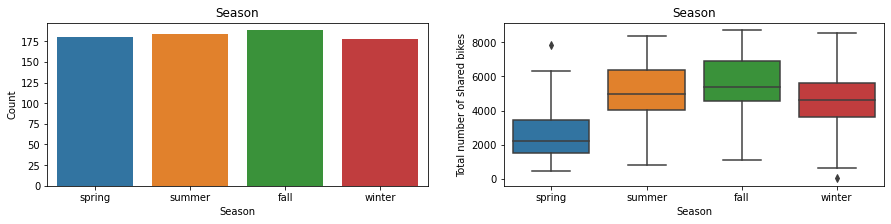

In [153]:
plot_var('season','Season',False)

we observe that total number of shared bikes count is highest in fall followed by summer
and least in spring

In [154]:
#checking feels like temperarture across the 4 months
bike_sharing_data.groupby(['season'])['temp'].describe()


,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,188.0,28.958682,2.904749,19.235847,27.350413,29.297903,30.758538,35.328347
spring,180.0,12.197035,4.221457,2.424346,9.114700,11.706525,14.849124,23.472500
summer,184.0,22.320611,5.028649,10.374763,18.783115,23.045423,25.898347,33.141653
winter,178.0,17.339148,4.421179,9.054153,13.581240,16.775827,21.055222,26.957500


we notice that the temperature drop to a value of 4 degrees and has an avg value of 14 degrees during spring season.
This may be one of the reason for less no of shrared bikes count.

### 2.yr

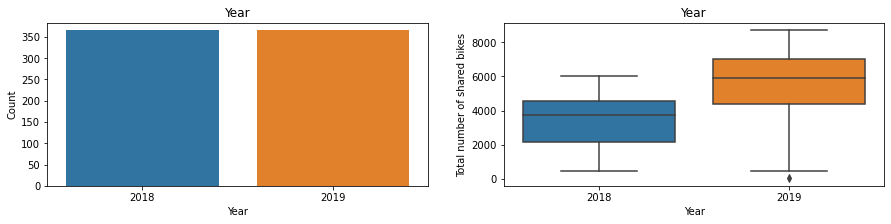

In [155]:
plot_var('yr','Year',False)

we observe that the number of shared bikes have significantly increased during the year 2019 in comparison with 2018.
we see that 75% of users in 2018 accounts to 25% users in 2019.

### 3.mnth

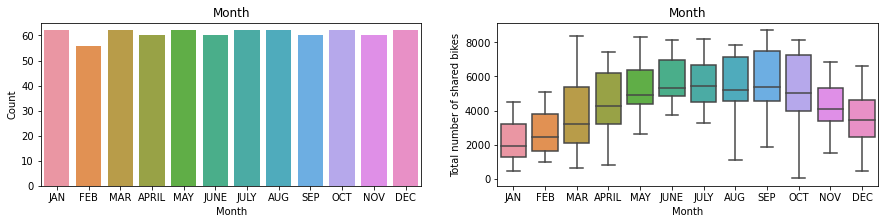

In [156]:
plot_var('mnth','Month',False)

We observe that the median for months may,june,july,august,september,october is comparable and high compared with other months(jan,feb,march,april,nov,dec)
Therefore we can say that no of hired bikes count is high during the months of may,june,july,august,september,october

### 4. holiday

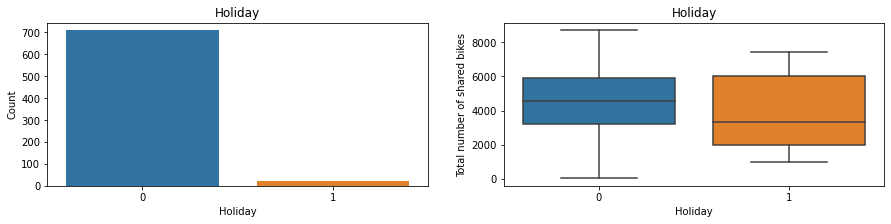

In [157]:
plot_var('holiday','Holiday',False)

We observe that the spread of number of shared bikes on a holiday is high but the median value is significantly low in comparison to the number of shared bikes on a working day.
So we can count of average bikes hired is higher on a working day compared to a holiday.

### 5.weekday

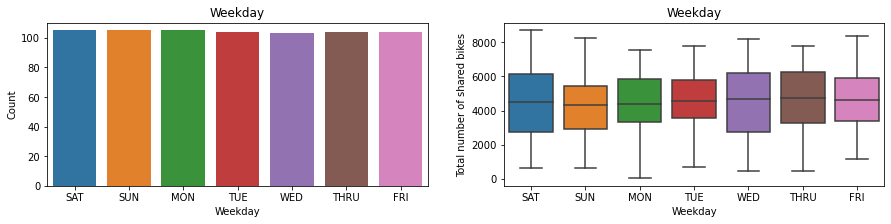

In [158]:
plot_var('weekday','Weekday',False)

We observe that the average no of bikes hired on different days of the week is almost the same.We also observe high variations on wednesdays and saturdays.

### 6.workingday

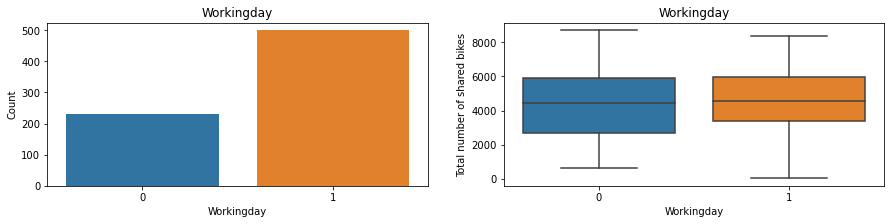

In [159]:
plot_var('workingday','Workingday',False)

We observe that there is no significant difference in the number of bikes hired on a working day and a non working day

### 7.weathersit

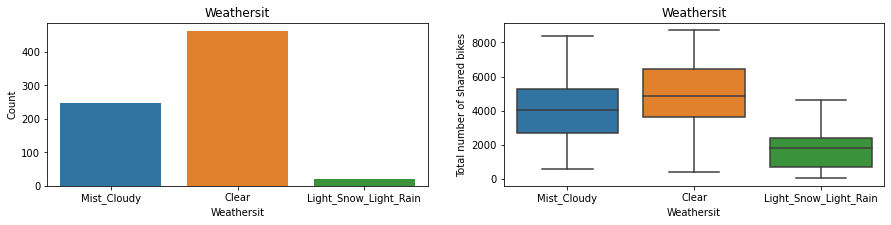

In [160]:
plot_var('weathersit','Weathersit',False)

We observe that number of bikes hired is directly proportional to the weather conditions.People prefer to hire bikes on a clear weather day.

### 8.temp

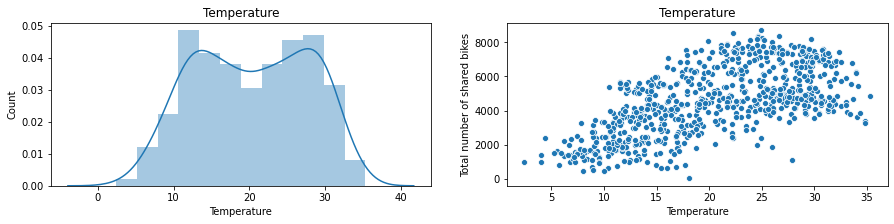

In [161]:
plot_var('temp','Temperature',True)

We observe that the total number of bikes hired increases with increase in temperrature. The count is high for the temperature ranging between 20-34 degree celcius.

### 9.hum

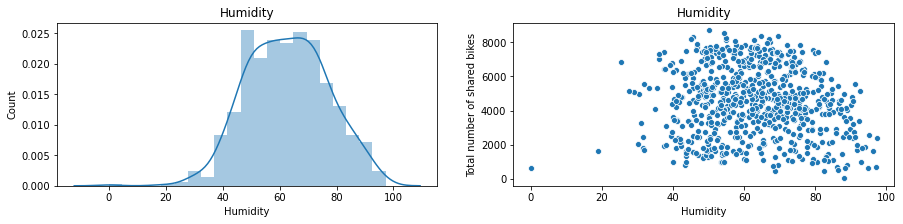

In [162]:
plot_var('hum','Humidity',True)

We observe that the data points are higly populated between the range 50-80.The number of bikes hired decreases as we approach towards extreme humidity conditons i.e less than 40 and more than 80

### 10.windspeed

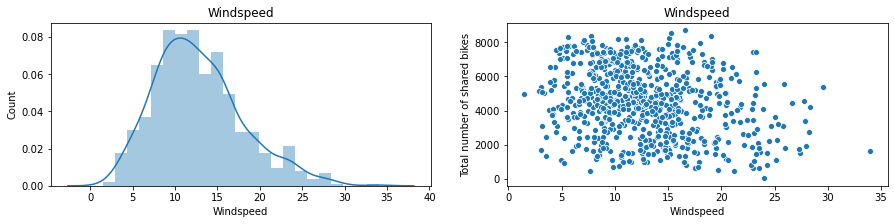

In [163]:
plot_var('windspeed','Windspeed',True)

We observe that the data points are higly populated between the range 7-15 windspeed.The number of bikes hired decreases as we approach towards extreme windspeed conditons i.e less than 5 and more than 25

### Pair plot of all numeric variables

<Figure size 1152x720 with 0 Axes>

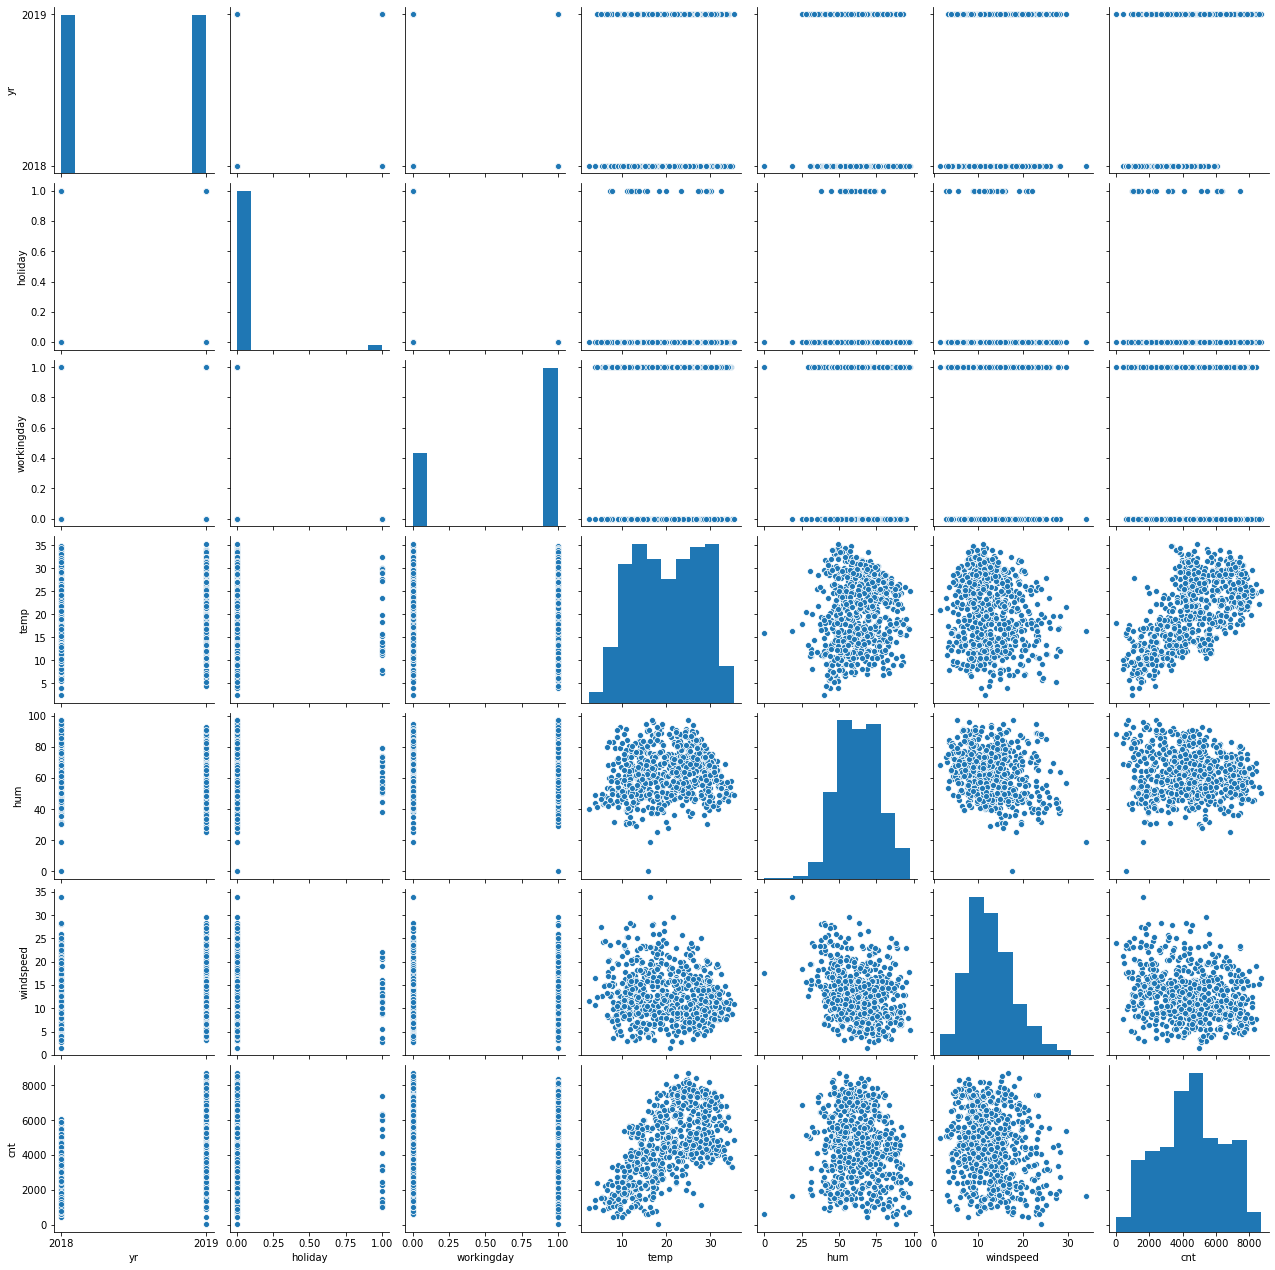

In [164]:
plt.figure(figsize = (16, 10))
sns.pairplot(bike_sharing_data)
plt.show()

We can check relationship of our target variable 'cnt' with other variables.Also we can check pairs of varibles which are highly collinear.
Observations:
 - cnt has increased in 2019 compared to 2018
 - cnt is higher on a non-holiday day
 - working and non-working shows same cnt values
 - cnt increase with increase in temperature untill a certain temperature value(34 degrees) and then decreses


### Heatmap : check correlation between variables

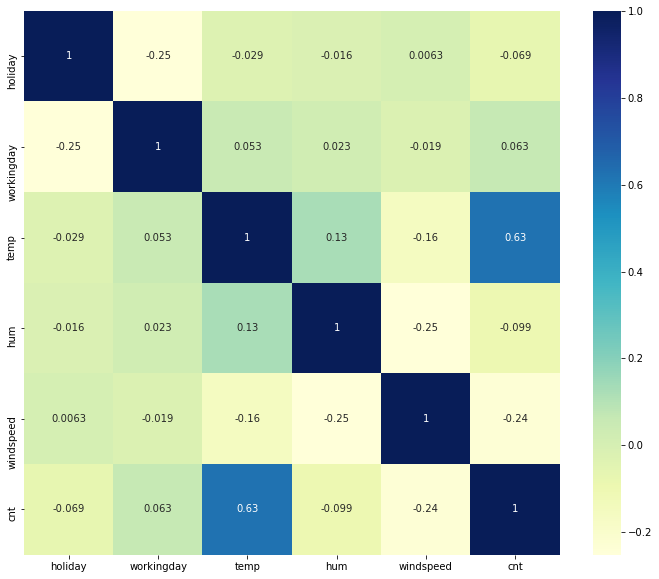

In [165]:
plt.figure(figsize = (12, 10))
sns.heatmap(bike_sharing_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

- We observe that cnt is highly correlated with temperature 63% followed by windspeed 24%
- We observe that windspeed and temperature are also positively correlated by 16% and temperature and humidity are positively correlated by 13%.
- windspeed and humidity are negatively correlated by 25% and holiday and working day negatively correlated by 25%

## Step 3: Data Preparation

- convert categorical variables to dummy values
- divide the data into train and test set
- rescaling the data to bring all predictor variables to the same scale
- divide the data inot X and y

#### convert categorical variables to dummy values

In [167]:
#list of categorical varibles with two levels
#yr
#list of categorical varibles with more than two levels
#season,mnth,weekday,weathersit

#converting 2 level categorical variable to numeric
bike_sharing_data['yr'] = bike_sharing_data['yr'].map({'2018':0,'2019':1})

In [168]:
#converting more than 2 level categorical variable to numeric values

# mnth : 12 levels
# get dummy variables for the feature mnth and store it in a variable months
months =pd.get_dummies(bike_sharing_data['mnth'])
#drop JAN col
months = months.drop(['JAN'],axis=1)
#Add the result to the original dataframe
bike_sharing_data = pd.concat([bike_sharing_data,months],axis=1)
#drop mnth as we have created dummy varibleas for it
bike_sharing_data.drop(['mnth'],axis=1,inplace=True)

In [169]:
bike_sharing_data.head(5)

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,APRIL,AUG,DEC,FEB,JULY,JUNE,MAR,MAY,NOV,OCT,SEP
0,spring,0,0,SAT,0,Mist_Cloudy,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0
1,spring,0,0,SUN,0,Mist_Cloudy,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0
2,spring,0,0,MON,1,Clear,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0
3,spring,0,0,TUE,1,Clear,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0
4,spring,0,0,WED,1,Clear,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0


In [170]:
bike_sharing_data.shape

(730, 21)

In [171]:
#weekday :7 level
#create dummy variables for weekday in a new variable weekday_dummies
weekday_dummies = pd.get_dummies(bike_sharing_data['weekday'])
#drop SUN as 6 columns are enough to identify 7 days of the week
weekday_dummies.drop(['MON'],axis=1,inplace=True)
#concat the result with original dataset 'bike_sharing_data'
bike_sharing_data = pd.concat([bike_sharing_data,weekday_dummies],axis=1)
#drop weekday as we have created dummy varibleas for it
bike_sharing_data.drop(['weekday'],axis=1,inplace=True)

In [172]:
bike_sharing_data.head(5)

,season,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,APRIL,AUG,DEC,FEB,JULY,JUNE,MAR,MAY,NOV,OCT,SEP,FRI,SAT,SUN,THRU,TUE,WED
0,spring,0,0,0,Mist_Cloudy,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,spring,0,0,0,Mist_Cloudy,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,spring,0,0,1,Clear,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,spring,0,0,1,Clear,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,spring,0,0,1,Clear,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [173]:
bike_sharing_data.shape

(730, 26)

In [174]:
# weathersit has 4 levels ,create dummy variables in new variable weathersit_dummies
# but the bike_sharing_data has no data corresponding to 4th type 'Heavy_Rain_Ice_Pallets'
weathersit_dummies = pd.get_dummies(bike_sharing_data['weathersit'])
#drop Light_Snow_Light_Rain
weathersit_dummies = weathersit_dummies.drop(['Light_Snow_Light_Rain'],axis=1)
#concat result with bike_sharing_data
bike_sharing_data  = pd.concat([bike_sharing_data,weathersit_dummies],axis=1)
# drop col weathersit as we have created dummy variables for it
bike_sharing_data.drop(['weathersit'],axis=1,inplace=True)

In [175]:
bike_sharing_data.head(5)

,season,yr,holiday,workingday,temp,hum,windspeed,cnt,APRIL,AUG,DEC,FEB,JULY,JUNE,MAR,MAY,NOV,OCT,SEP,FRI,SAT,SUN,THRU,TUE,WED,Clear,Mist_Cloudy
0,spring,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,spring,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,spring,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [176]:
#season 4 levels
#create dummy variables for season in a new variable season_dummies
season_dummies = pd.get_dummies(bike_sharing_data['season'])
#drop spring
season_dummies = season_dummies.drop(['spring'],axis=1)
# concat result with bike_sharing_data dataframe
bike_sharing_data = pd.concat([bike_sharing_data,season_dummies],axis=1)
# drop col season as we have created dummy variables for it
bike_sharing_data.drop(['season'],axis=1,inplace=True)

In [177]:
bike_sharing_data.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,APRIL,AUG,DEC,FEB,JULY,JUNE,MAR,MAY,NOV,OCT,SEP,FRI,SAT,SUN,THRU,TUE,WED,Clear,Mist_Cloudy,fall,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [178]:
bike_sharing_data.shape

(730, 29)

#### divide the data into train and test set

In [179]:
#in order to get same set of random number each time
np.random.seed(0)
df_train,df_test = train_test_split(bike_sharing_data, train_size=0.7, test_size=0.3, random_state=100)

In [180]:
df_train.shape

(510, 29)

In [181]:
df_test.shape

(219, 29)

#### rescaling the data to bring all predictor variables to the same scale

In [182]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,APRIL,AUG,DEC,FEB,JULY,JUNE,MAR,MAY,NOV,OCT,SEP,FRI,SAT,SUN,THRU,TUE,WED,Clear,Mist_Cloudy,fall,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,20.102429,63.112926,12.831318,4486.382353,0.078431,0.096078,0.084314,0.066667,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.127451,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.343137,0.262745,0.245098,0.24902
std,0.500429,0.157763,0.468282,7.431169,14.156632,5.291832,1952.158739,0.269113,0.294988,0.278131,0.249689,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.333805,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.475223,0.440557,0.430568,0.43287
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


We observe that few of the predictor varibles have different sclaes,for eg:
    - humidity(hum) varies between 0 to 97
    - temp varies between 2-35 and windspeed varies between 3-34
Therefore we use min-max scaling to bring all variables between 0-1 scale

In [183]:
#rescaling
scaler =  MinMaxScaler() ##vedika

In [184]:
# apply scalar() to all the columns except yes/no and dummy variables
cols_to_rescale = ['temp','hum','windspeed','cnt']

In [185]:
df_train[cols_to_rescale] = scaler.fit_transform(df_train[cols_to_rescale])

In [186]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,APRIL,AUG,DEC,FEB,JULY,JUNE,MAR,MAY,NOV,OCT,SEP,FRI,SAT,SUN,THRU,TUE,WED,Clear,Mist_Cloudy,fall,summer,winter
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [187]:
df_train.describe()
#all columns have max value as 1,succuessfully rescaled between 0-1

,yr,holiday,workingday,temp,hum,windspeed,cnt,APRIL,AUG,DEC,FEB,JULY,JUNE,MAR,MAY,NOV,OCT,SEP,FRI,SAT,SUN,THRU,TUE,WED,Clear,Mist_Cloudy,fall,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.078431,0.096078,0.084314,0.066667,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.127451,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.343137,0.262745,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.269113,0.294988,0.278131,0.249689,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.333805,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.475223,0.440557,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


#### divide the data inot X and y

In [188]:
y_train = df_train.pop('cnt')
X_train = df_train

In [189]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,APRIL,AUG,DEC,FEB,JULY,JUNE,MAR,MAY,NOV,OCT,SEP,FRI,SAT,SUN,THRU,TUE,WED,Clear,Mist_Cloudy,fall,summer,winter
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


### Step 4: Data modeling

- create linear regression model using mixed approach i.e automated feature elimination followed by manual feature elimination
- automated feature elimination : RFE
- manual feature elimination : VIF and p-value

#### automated feature elimination : RFE

We have total 29 columns out of which we will select the top 10 columns using RFE

In [190]:
#calculate the VIF before performing RFE
vif = pd.DataFrame()
X   = X_train
vif['Features'] = X.columns
vif['VIF']      = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by=['VIF'],ascending=False)

,Features,VIF
2,workingday,90.358123
18,SAT,19.919736
19,SUN,19.459623
25,fall,11.353860
23,Clear,10.576012
7,AUG,9.881606
24,Mist_Cloudy,9.162521
10,JULY,8.896884
27,winter,8.206748
3,temp,7.118264


In [191]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [192]:
#running RFE
rfe = RFE(lm,10)
rfe = rfe.fit(X_train, y_train)

In [193]:
#column wise rankings assigned by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('APRIL', False, 9),
 ('AUG', False, 2),
 ('DEC', False, 14),
 ('FEB', False, 11),
 ('JULY', False, 12),
 ('JUNE', False, 10),
 ('MAR', False, 7),
 ('MAY', False, 8),
 ('NOV', False, 13),
 ('OCT', False, 5),
 ('SEP', True, 1),
 ('FRI', False, 15),
 ('SAT', False, 3),
 ('SUN', False, 18),
 ('THRU', False, 17),
 ('TUE', False, 19),
 ('WED', False, 16),
 ('Clear', True, 1),
 ('Mist_Cloudy', True, 1),
 ('fall', False, 6),
 ('summer', True, 1),
 ('winter', True, 1)]

In [194]:
#top 10 columns after running RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'SEP', 'Clear',
       'Mist_Cloudy', 'summer', 'winter'],
      dtype='object')

In [195]:
#columns removed after running RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'APRIL', 'AUG', 'DEC', 'FEB', 'JULY', 'JUNE', 'MAR',
       'MAY', 'NOV', 'OCT', 'FRI', 'SAT', 'SUN', 'THRU', 'TUE', 'WED', 'fall'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [196]:
# Creating X_test_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [197]:
# Adding a constant 
X_train_rfe = sm.add_constant(X_train_rfe)

In [198]:
X_train_rfe.head(5)

,const,yr,holiday,temp,hum,windspeed,SEP,Clear,Mist_Cloudy,summer,winter
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,1
576,1.0,1,0,0.815169,0.725633,0.264686,0,1,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,1,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,1,1,0


In [199]:
# create model & fit model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [200]:
#get statistical summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.80e-190
Time:                        18:58:18   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0110      0.043     -0.255      0.799      -0.096       0.074
yr              0.2289      0.008     27.907      0.000       0.213       0.245
holiday        -0.0980      0.026     -3.787      0.000      -0.149      -0.047
temp            0.5706      0.020     28.206      0.000       0.531       0.610
hum            -0.1740      0.038     -4.594      0.000      -0.248      -0.100
windspeed      -0.1867      0.026     -7.207      0.000      -0.238      -0.136
SEP             0.1067      0.016      6.793      0.000       0.076       0.138
Clear           0.2367      0.027      8.899      0.000       0.184       0.289
Mist_Cloudy     0.1848      0.025      7.315      0.000       0.135       0.234
summer          0.0895      0.010      8.719      0.000       0.069       0.110
winter          0.1402      0.010     13.386      0.000       0.120       0.161
==============================================================================
Omnibus:                       60.330   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.807
Skew:                          -0.668   Prob(JB):                     4.80e-28
Kurtosis:                       5.033   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
#calculate the VIF for the new model after RFE
vif = pd.DataFrame()
X   = X_train[col]
vif['Features'] = X.columns
vif['VIF']      = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by=['VIF'],ascending=False)

,Features,VIF
3,hum,17.805356
6,Clear,9.728799
2,temp,8.421171
7,Mist_Cloudy,7.307873
4,windspeed,4.115586
0,yr,2.062341
9,winter,1.662805
8,summer,1.577955
5,SEP,1.211128
1,holiday,1.041705


#### We observe that 

- top predictor variables after RFE are
  'yr', 'holiday', 'temp', 'hum', 'windspeed', 'SEP', 'Clear','Mist_Cloudy', 'summer', 'winter'
- pvalue for all features is zero i.e all faetures are significant
- R2=0.838 and adjusted R2=0.834 implies 83 percent variance in the demand is explained by the predictor variables
- VIF for few variables is higher than 5 i.e multicolinearity exists

#### manual feature elimination : VIF and p-value

In [202]:
# drop variable hum and rebuild the model
X = X_train[col]
X.drop(['hum'],axis=1,inplace=True)
X.head(5)

,yr,holiday,temp,windspeed,SEP,Clear,Mist_Cloudy,summer,winter
653,1,0,0.509887,0.300794,0,1,0,0,1
576,1,0,0.815169,0.264686,0,1,0,0,0
426,1,0,0.442393,0.255342,0,0,1,0,0
728,1,0,0.245101,0.663106,0,1,0,0,0
482,1,0,0.395666,0.188475,0,0,1,1,0


In [203]:
#add const and rebuild the model
X_train_lm = sm.add_constant(X)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.37e-186
Time:                        18:59:01   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1574      0.030     -5.273      0.000      -0.216      -0.099
yr              0.2328      0.008     27.973      0.000       0.216       0.249
holiday        -0.0992      0.026     -3.761      0.000      -0.151      -0.047
temp            0.5480      0.020     27.381      0.000       0.509       0.587
windspeed      -0.1533      0.025     -6.045      0.000      -0.203      -0.103
SEP             0.1011      0.016      6.327      0.000       0.070       0.132
Clear           0.2838      0.025     11.344      0.000       0.235       0.333
Mist_Cloudy     0.2041      0.025      8.030      0.000       0.154       0.254
summer          0.0868      0.010      8.307      0.000       0.066       0.107
winter          0.1306      0.010     12.476      0.000       0.110       0.151
==============================================================================
Omnibus:                       57.277   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.021
Skew:                          -0.648   Prob(JB):                     6.40e-26
Kurtosis:                       4.945   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
#calculate the VIF for the new model after dropping hum
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']      = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by=['VIF'],ascending=False)

,Features,VIF
5,Clear,7.273473
2,temp,6.668241
6,Mist_Cloudy,4.115769
3,windspeed,4.044035
0,yr,2.059966
7,summer,1.569363
8,winter,1.448228
4,SEP,1.202376
1,holiday,1.041562


In [205]:
# drop variable clear and rebuild the model
X.drop(['Clear'],axis=1,inplace=True)
X.head(5)

,yr,holiday,temp,windspeed,SEP,Mist_Cloudy,summer,winter
653,1,0,0.509887,0.300794,0,0,0,1
576,1,0,0.815169,0.264686,0,0,0,0
426,1,0,0.442393,0.255342,0,1,0,0
728,1,0,0.245101,0.663106,0,0,0,0
482,1,0,0.395666,0.188475,0,1,1,0


In [206]:
#add const and rebuild the model
X_train_lm = sm.add_constant(X)
lm_3 = sm.OLS(y_train, X_train_lm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     231.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.28e-163
Time:                        18:59:08   Log-Likelihood:                 433.22
No. Observations:                 510   AIC:                            -848.4
Df Residuals:                     501   BIC:                            -810.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1228      0.019      6.538      0.000       0.086       0.160
yr              0.2385      0.009     25.634      0.000       0.220       0.257
holiday        -0.0854      0.030     -2.893      0.004      -0.143      -0.027
temp            0.5498      0.022     24.521      0.000       0.506       0.594
windspeed      -0.1818      0.028     -6.431      0.000      -0.237      -0.126
SEP             0.0908      0.018      5.082      0.000       0.056       0.126
Mist_Cloudy    -0.0665      0.010     -6.750      0.000      -0.086      -0.047
summer          0.0869      0.012      7.423      0.000       0.064       0.110
winter          0.1165      0.012     10.010      0.000       0.094       0.139
==============================================================================
Omnibus:                      130.142   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.359
Skew:                          -1.169   Prob(JB):                     2.61e-93
Kurtosis:                       6.820   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
#calculate the VIF for the new model after dropping Clear
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']      = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by=['VIF'],ascending=False)

,Features,VIF
2,temp,3.675988
3,windspeed,2.993071
0,yr,1.992973
6,summer,1.561147
5,Mist_Cloudy,1.450589
7,winter,1.351764
4,SEP,1.200745
1,holiday,1.032861


In [208]:
X.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'SEP', 'Mist_Cloudy', 'summer',
       'winter'],
      dtype='object')

#### we observe that
 - list of columns after rebuilding the model third time
   'yr', 'holiday', 'temp', 'windspeed', 'SEP', 'Mist_Cloudy', 'summer','winter'
 - All the predictor variables have p-value less than 0.05 ,therefor all of them are significant in predicting bike demand
 - All the predictor variables have VIF values less than 5 ,we have handled multi-collinearity 
 - We observed that R2 value has dropped from 83% to 78% after dropping vaiables with high VIF values (hum,CLear)

## Step 5: Residual Analysis of the train data
- check if the error terms are also normally distribute

In [209]:
#predict y_train values
y_train_pred = lm_3.predict(X_train_lm)
y_train_pred.head(10)

653    0.703475
576    0.761336
426    0.491646
728    0.375516
482    0.565050
111    0.264137
580    0.780175
500    0.812524
479    0.704373
472    0.609594
dtype: float64

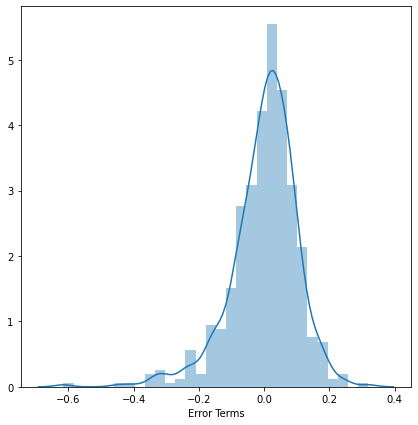

In [210]:
#plot histogram of the error terms
plt.figure(figsize=(7,7))
sns.distplot((y_train-y_train_pred),bins=30)
plt.xlabel('Error Terms')
plt.show()

Error terms are centered at zero and normaly distributed.

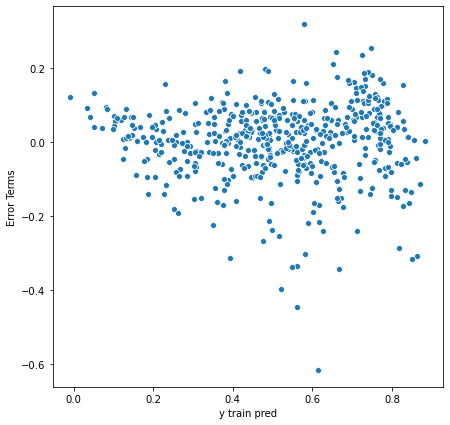

In [211]:
#plot error terms vs y_test_pred to check any patterns in error terms
plt.figure(figsize=(7,7))
sns.scatterplot(y=(y_train-y_train_pred),x=y_train_pred)
plt.ylabel('Error Terms')
plt.xlabel('y train pred')
plt.show()

we observe no patter in distribution on error terms ,therefore can conclude that error terms are independent of each other

## Step 6: Making Predictions Using the Final Model

In [212]:
# performing transformations on the test set
# rescaling test set
cols_to_rescale   = ['temp','hum','windspeed','cnt']
df_test[cols_to_rescale] = scaler.transform(df_test[cols_to_rescale])

In [213]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,APRIL,AUG,DEC,FEB,JULY,JUNE,MAR,MAY,NOV,OCT,SEP,FRI,SAT,SUN,THRU,TUE,WED,Clear,Mist_Cloudy,fall,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.091324,0.059361,0.086758,0.100457,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.178082,0.118721,0.146119,0.164384,0.164384,0.100457,0.652968,0.319635,0.246575,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.288730,0.236840,0.282125,0.301297,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.383458,0.324202,0.354034,0.371472,0.371472,0.301297,0.477117,0.467403,0.432005,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [214]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [215]:
#add constan
X_test_lm = sm.add_constant(X_test)
X_test_lm.head(5)

,const,yr,holiday,workingday,temp,hum,windspeed,APRIL,AUG,DEC,FEB,JULY,JUNE,MAR,MAY,NOV,OCT,SEP,FRI,SAT,SUN,THRU,TUE,WED,Clear,Mist_Cloudy,fall,summer,winter
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [216]:
# create x-test_lm_3 data frame by dropping cols 
#['workingday','hum','APRIL','AUG','DEC','FEB','JULY','JUNE','MAR','MAY','NOV','OCT','FRI','SAT','SUN','THRU','TUE','WED','Clear','fall']
X_test_lm = X_test_lm.drop(['workingday','hum','APRIL','AUG','DEC','FEB','JULY','JUNE','MAR','MAY','NOV','OCT','FRI','SAT','SUN','THRU','TUE','WED','Clear','fall'],axis=1)


In [217]:
#make predictions on test set
y_test_pred = lm_3.predict(X_test_lm)

### Step 7: Model Evaluation:comparing R2 score for test and train model

In [218]:
#calculate R2 on test set
#r-sqaure
r2_train = r2_score(y_true = y_train, y_pred = y_train_pred)
r2_train

0.7873028099386827

In [219]:
#calculate R2 on test set
#r-sqaure
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_test

0.7690313110260333

We observe that test R2 is within 5% train R2 ,is pretty good metrix to indicate stability
we can say that the what model has learnt on the training set ,it is able to generalise on the unseen test set as well

In [220]:
#mean squared error
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.1047379804093529

Text(0, 0.5, 'y_test_pred')

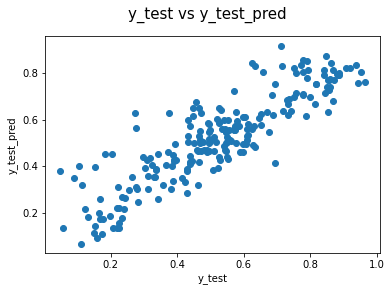

In [221]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 15)
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_test_pred', fontsize = 10)     

The eqaton of our best fitted line is
<p>y= (0.2385 X yr) - (0.0854 X holiday) + (0.5498 X temp) - (0.1818 X windspeed) + (0.0908 X SEP) - (0.0665 X Mist_Cloudy) + (0.0869 X summer) + (0.1165 X winter)</p>

Top 3 predictor variables are
- temp      (+ve correlation)
- yr        (+ve correlation)
- windspeed (-ve correlation)